# Imports

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

# Get data

In [2]:
data = pd.read_csv('../../data/avalancheaccidentsswitzerlandsince1995.csv', encoding = "latin1")
data.head()

,avalanche.id,date,date.quality,hydrological.year,canton,local.name,start.zone.coordinates.x,start.zone.coordinates.y,coordinates.quality,start.zone.elevation,start.zone.slope.aspect,start.zone.inclination,forecasted.dangerlevel,number.dead,number.caught,number.fully.buried,activity
0,13007,1995-12-25,0,1995/96,VS,Chetseron / Vallon de l`Ertentse,602380,131230,25,2060,NW,NaN,NaN,2,2,0,offpiste
1,13014,1995-12-28,0,1995/96,VS,Verbier / Les Ruinettes,586070,104160,25,2340,NNE,39.0,NaN,1,1,1,offpiste
2,13028,1996-01-14,0,1995/96,GR,Chilchalphorn,731720,155110,25,2960,E,35.0,NaN,1,4,2,tour
3,13038,1996-02-14,0,1995/96,VD,La Lécherette,575300,141010,25,1580,NNW,42.0,NaN,1,2,1,offpiste
4,13040,1996-02-15,0,1995/96,OW,Pilatus / Matthorn / Ruessiflue,661640,202180,25,1860,NW,40.0,NaN,1,4,3,tour


# Preliminary insight

### Number of avalanches by canton

In [3]:
data['canton'].value_counts()

VS       153
GR       112
BE        46
UR        17
SG        12
VD         9
SZ         7
TI         5
NW         5
FR         4
OW         3
GL         3
LU         2
AI         2
OW/LU      1
Name: canton, dtype: int64

### Number of avalanches by slope inclination

(array([  2.,   1.,   8.,  25.,  70.,  94.,  57.,  10.,  14.,   4.]),
 array([ 23. ,  26.2,  29.4,  32.6,  35.8,  39. ,  42.2,  45.4,  48.6,
         51.8,  55. ]),
 <a list of 10 Patch objects>)

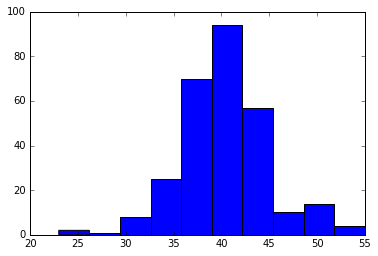

In [4]:
def removenan(x):
    return [value for value in np.array(x) if not math.isnan(value)]
plt.hist(removenan(data['start.zone.inclination']))

### Number of avalanches by activity

In [5]:
data['activity'].value_counts()

tour                       225
offpiste                   138
transportation.corridor     13
building                     3
other, mixed or unknown      2
Name: activity, dtype: int64

# Any difference between cantons in terms of avalanche slopes?

### Comparing elevations and slope inclination across cantons

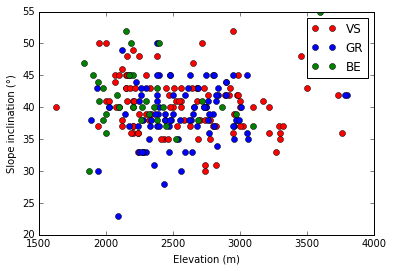

In [6]:
plt.plot(data['start.zone.elevation'][data['canton']=='VS'].values, data['start.zone.inclination'][data['canton']=='VS'].values, 'ro', label='VS')
plt.plot(data['start.zone.elevation'][data['canton']=='GR'].values, data['start.zone.inclination'][data['canton']=='GR'].values, 'bo', label='GR')
plt.plot(data['start.zone.elevation'][data['canton']=='BE'].values, data['start.zone.inclination'][data['canton']=='BE'].values, 'go', label='BE')

plt.xlabel('Elevation (m)')
plt.ylabel('Slope inclination (°)')
plt.legend()

We can see that in GR, there seems to be more avalanches for a slope inclination below 35° than in VS and BE. We can also notice that avalanches higher than 3000 meters occur mostly in VS, but this is probably due to the fact that VS contains the biggest mountains in Switzerland.

### Comparing slope exposition across cantons

In [7]:
canton = 'VS' #Choose a canton
serie = data['start.zone.slope.aspect'][data['canton']==canton]
serie.value_counts()/len(serie)

N      0.143791
NE     0.137255
NW     0.098039
NNE    0.091503
SE     0.084967
NNW    0.078431
E      0.065359
SW     0.058824
W      0.058824
S      0.052288
WNW    0.045752
WSW    0.039216
ESE    0.019608
ENE    0.013072
SSW    0.006536
SSE    0.006536
Name: start.zone.slope.aspect, dtype: float64

# Difference between activities

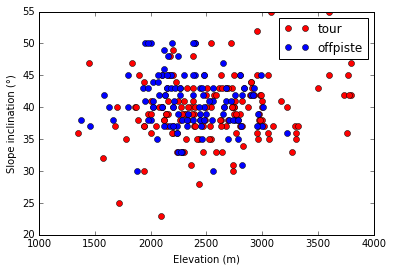

In [8]:
plt.plot(data['start.zone.elevation'][data['activity']=='tour'].values, data['start.zone.inclination'][data['activity']=='tour'].values, 'ro', label='tour')
plt.plot(data['start.zone.elevation'][data['activity']=='offpiste'].values, data['start.zone.inclination'][data['activity']=='offpiste'].values, 'bo', label='offpiste')

plt.xlabel('Elevation (m)')
plt.ylabel('Slope inclination (°)')
plt.legend()

Visually we cannot see much difference, except that avalanches above 3000 meters occur mostly during ski tours and not offpiste, this is intuitive because very few ski lifts go above 3000 meters.

### Difference between forecasted danger level between activities

In [9]:
activity = 'offpiste' #Choose an activity
data['forecasted.dangerlevel'][data['activity']==activity].value_counts()

3.0    90
2.0    24
4.0     4
1.0     3
Name: forecasted.dangerlevel, dtype: int64

We notice that although there are about the same number of avalanches by degree 3 for offpiste and ski tours, there are three times as much for ski tours by degree 2 than offpiste. 

### Differences of inclination

(array([  2.,   1.,   5.,  17.,  42.,  56.,  29.,   6.,   7.,   3.]),
 array([ 23. ,  26.2,  29.4,  32.6,  35.8,  39. ,  42.2,  45.4,  48.6,
         51.8,  55. ]),
 <a list of 10 Patch objects>)

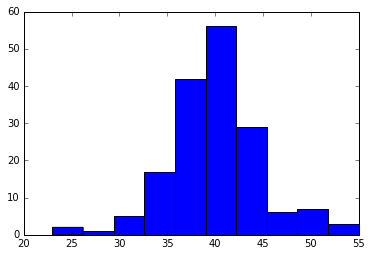

In [10]:
activity = 'tour'
plt.hist(removenan(data['start.zone.inclination'][data['activity']==activity]))

There does not seem to be a major difference between offpiste and ski tours for slope inclination.

# Is there a difference between the seasons

### Adding a column 'month' to the database

In [11]:
data['month'] = list(map(lambda x : x.split('-')[1], data['date']))

### Plotting a heatmap of month against elevation

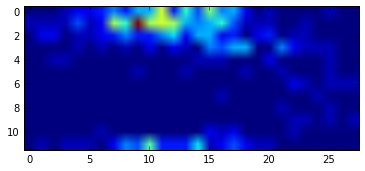

In [12]:
data['elevation_rounded'] = list(map(lambda x :  int(math.ceil(x / 100.0)) * 100, data['start.zone.elevation']))
plt.imshow(pd.crosstab(data['month'], data['elevation_rounded']))

We can see that during summer avalanches occur mostly at very high elevations, compared to winter

### Elevation against month

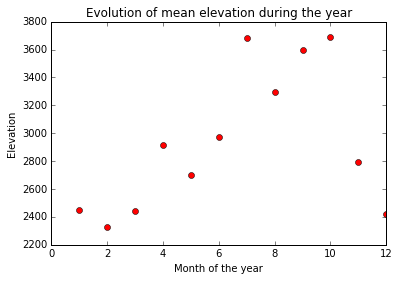

In [13]:
plt.plot(data.groupby(['month']).mean()['start.zone.elevation'], 'ro')
plt.xlabel('Month of the year')
plt.ylabel('Elevation')
plt.title('Evolution of mean elevation during the year')

We have to be careful about this plot because there are dramatically less avalanches in Spring, Summer and Autumn than in Winter (so it might not be statistically significant), but it seems that there is a linear relationship between end of Winter and end of Spring for the mean elevation of the avalanches.

### Inclination against month

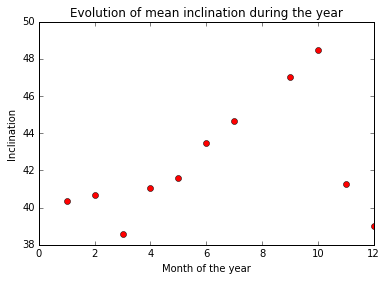

In [14]:
plt.plot(data.groupby(['month']).mean()['start.zone.inclination'], 'ro')
plt.xlabel('Month of the year')
plt.ylabel('Inclination')
plt.title('Evolution of mean inclination during the year')

The same remark seems to hold for inclination.

### Number of avalanches by month

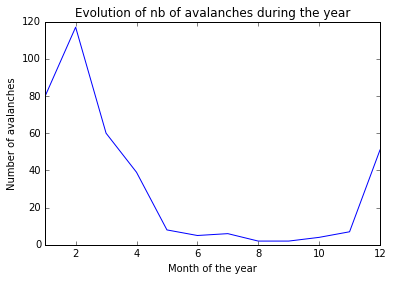

In [15]:
plt.plot(data['month'].value_counts().sort_index())
plt.xlim(1,12)
plt.xlabel('Month of the year')
plt.ylabel('Number of avalanches')
plt.title('Evolution of nb of avalanches during the year')

### Heatmap of month against slope orientation

In [16]:
#Reducing the number of different orientations for more statistical significance

orientations_toround = ['NNE','ENE','ESE','SSE','SSW','WSW','WNW','NNW']
orientations_round = ['N','E','E','S','S','W','W','N']

data['orientation_rounded'] = data['start.zone.slope.aspect']
for i in range(len(orientations_toround)):
    data.loc[data['orientation_rounded']==orientations_toround[i], 'orientation_rounded'] = orientations_round[i]

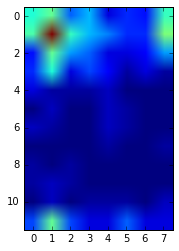

In [17]:
df_orientation = pd.crosstab(data['month'], data['orientation_rounded'])
plt.imshow(df_orientation)
#plt.imshow(df_orientation.div(df_orientation.sum(axis=1), axis=0))

We do not see much difference in terms of orientations between the different periods of the year on this plot.